In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
%matplotlib inline
fig_dir = "/Users/crankshaw/model-serving/clipper_paper/ModelServingPaper/nsdi_2017/fake-figs"

log_loc = os.path.abspath(".")

results_files = []
for name in os.listdir(log_loc):
    if "results" in name:
        results_files.append(name)

# exp_names = [f for f in results_files]
# print exp_names

[('DEBUG_caching_off_message_100000_160909-123846_', 'DEBUG_caching_off_message_100000_160909-123846_batch_100000_results.json'), ('DEBUG_caching_off_message_1000_160909-115106_', 'DEBUG_caching_off_message_1000_160909-115106_batch_1000_results.json'), ('DEBUG_caching_off_message_100_160909-113228_', 'DEBUG_caching_off_message_100_160909-113228_batch_100_results.json'), ('DEBUG_caching_off_message_100_160909-113757_', 'DEBUG_caching_off_message_100_160909-113757_batch_100_results.json'), ('DEBUG_caching_off_message_10_160909-112500_', 'DEBUG_caching_off_message_10_160909-112500_batch_10_results.json'), ('DEBUG_caching_off_message_150000_160909-123922_', 'DEBUG_caching_off_message_150000_160909-123922_batch_150000_results.json'), ('DEBUG_caching_off_message_200000_160909-124002_', 'DEBUG_caching_off_message_200000_160909-124002_batch_200000_results.json'), ('DEBUG_caching_off_message_2000_160909-115206_', 'DEBUG_caching_off_message_2000_160909-115206_batch_2000_results.json'), ('DEBUG_c

In [33]:
def get_results(res_fname):
#     res_fname = fname + "_results.json"
#     conf_fname = fname + "_config.json"
    with open(os.path.join(log_loc, res_fname), "r") as rf:
        results = json.load(rf)
#         print(results)
        message_size = int(res_fname.split("_")[4])
#         print message_size
#         print json.dumps(results, indent=4)
        mean_latency = [l["mean"] for l in results["histograms"] if l["name"] == "noop:model_latency"][0]
        thruput = [m["rate"] for m in results["meters"] if m["name"] == "noop:model_thruput"][0]
    return (message_size, (mean_latency, thruput))
extracted_results = [get_results(r) for r in results_files]
extracted_results.sort()

In [46]:
xs, ys = zip(*extracted_results)
lats, thrus = zip(*ys)
xs = np.array(xs)
lats = np.array(lats)
thrus = np.array(lats)/784.0
xs = xs/784.0


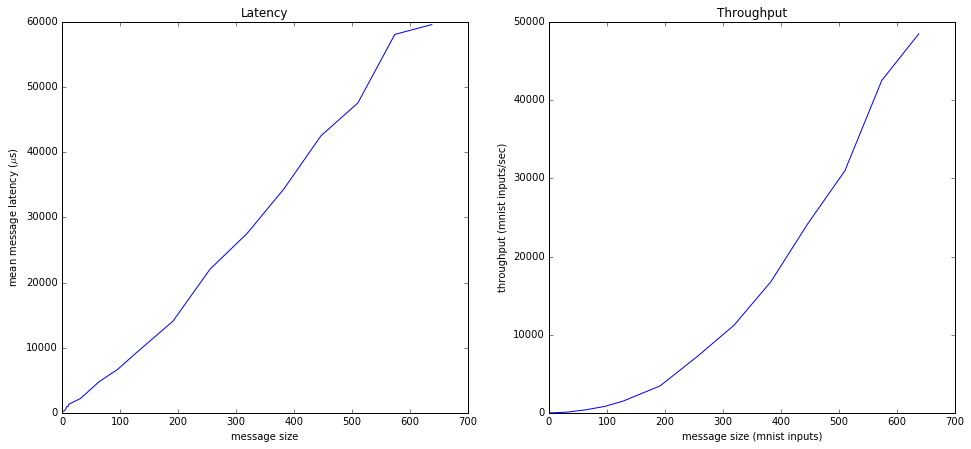

In [47]:



fig, (ax_l, ax_thru) = plt.subplots(nrows=1, ncols=2, figsize=(16,7))
ax_l.plot(xs, lats)
ax_l.set_xlabel("message size")
ax_l.set_ylabel("mean message latency ($\mu$s)")
ax_l.set_title("Latency")


ax_thru.plot(xs, thrus*xs)
ax_thru.set_xlabel("message size (mnist inputs)")
ax_thru.set_ylabel("throughput (mnist inputs/sec)")
ax_thru.set_title("Throughput")
ax_thru.yaxis.get_major_formatter().set_powerlimits((0, 100000000000))
# ax_thru.set_yscale("log")
# ax_thru.set_xscale("log")
plt.show()
